In [1]:
# Add dependencies
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
# Load data
tickers = ['PG', 'MSFT', 'F', 'GE']
df = pd.DataFrame()
for i in tickers:
    df[i] = wb.DataReader(i, data_source='yahoo', start='1995-1-1')['Adj Close']
df

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.820025,2.359439,4.264753,32.767971
1995-01-04,7.757341,2.376590,4.379497,32.767971
1995-01-05,7.647638,2.337388,4.341252,32.848282
1995-01-06,7.663312,2.376590,4.341252,32.687649
1995-01-09,7.631967,2.361889,4.417748,32.366402
...,...,...,...,...
2022-10-31,134.669998,232.130005,13.370000,77.809998
2022-11-01,134.880005,228.169998,13.400000,78.209999
2022-11-02,132.940002,220.100006,13.060000,77.400002


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7012 entries, 1995-01-03 to 2022-11-04
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      7012 non-null   float64
 1   MSFT    7012 non-null   float64
 2   F       7012 non-null   float64
 3   GE      7012 non-null   float64
dtypes: float64(4)
memory usage: 273.9 KB


In [6]:
# Calculate normalized data
norm_df = df/df.iloc[0] * 100

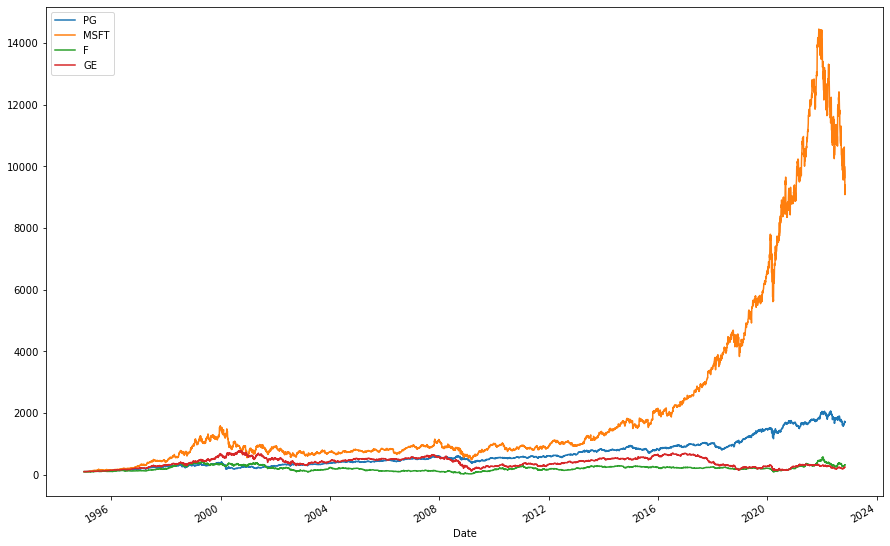

In [10]:
# Plot the normalized data
norm_df.plot(figsize = (15,10))
plt.show()

In [11]:
# Calculate Simple Rate of Returns
returns = (df/df.shift(1))-1
returns

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026905,0.000000
1995-01-05,-0.014142,-0.016495,-0.008733,0.002451
1995-01-06,0.002050,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828
...,...,...,...,...
2022-10-31,-0.004067,-0.015856,0.008296,-0.006639
2022-11-01,0.001559,-0.017059,0.002244,0.005141
2022-11-02,-0.014383,-0.035368,-0.025373,-0.010357


In [16]:
# Calclate average Annual RoR
annual_returns = returns.mean()*250
annual_returns

PG      0.126517
MSFT    0.211309
F       0.122313
GE      0.084009
dtype: float64

In [13]:
# Create weight array
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [22]:
# Calculate vector products (sumproducts)
portfolio1 = np.dot(annual_returns, weights)
print(f'{round(portfolio1*100,5)}%')

13.6037%


In [23]:
 weights2 = np.array([0.4, 0.4, 0.15, 0.05])

In [25]:
portfolio2 = np.dot(annual_returns, weights2)
print(f'{round(portfolio2*100,5)}%')

15.76778%
